# Week 4 - Data Science in the Real World
## <font color='#1A9FFF'>Workshop Outline</font>
<ul>
    <li>What to consider for a real world data science project</li>
    <li>Case study: conversion rate analysis</li>
</ul>

## <font color='#1A9FFF'>What to consider for a real world data science project?</font>
Things to keep in mind while doing a real world data science project:

**Understand business goals** - Always understand the business goals first. Your work will depend on the goals and the overall result is good only if you got them all correctly.

**Understand the data** - Always check with the data owner and business expert what the data represents. Don't make assumptions, just ask for clarification. 

**Check the data** - Never assume data is right. Always check data reliability and, if you find that some data doesn't make sense, clean it. 

** Build prototypes fast, then iterate** - Don't aim for the perfect model at first, build a prototype fast, present to the users to get feedback, and then improve it. 

** Don't make the solution over complicated** - You need to present the result to stakeholders who are highly likely to be non-technical. 

** Make sure your finding is actionable** - Focus on the business impact that your work could have. How would the company benefit from your analysis? How can your work generate actionable insights? What would you suggest as a next step?

## <font color='#1A9FFF'>Case study: Conversion Rate Analysis</font>
The conversion rate is the percentage of users who take a desired action, for example, buy a product, complete a survey or give a like on Facebook. Optimizing conversion rate is a very common work of a data scientist. 

We have data about users who visit a website: 
* Whether they converted or not 
* Some of their characteristics such as:
    * their country
    * their age
    * whether they are repeat users
    * marketing channel
    * the number of pages visited during that session (as a proxy for site activity/time spent on site).

**(Business goal)** The project is to:
* Analyse the conversion rate of different customer segments
* Come up with recommendations for the product team and the marketing team to improve the conversion rate. 

In [3]:
library(dplyr) # import dplyr package for data wrangling 
library(ggplot2) # import ggplot2 package for plotting

library(repr) # import repr package to change plotting size
options(repr.plot.width=4, repr.plot.height=3) # Change plot size to 4 x 3

data <- read.csv("datasets/conversion_data.csv") # read data


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

### Data Structure 
After reading in the data, we first do some simple exploration, check available columns, data structure, and data summary.

In [4]:
head(data) # take a look at the first 6 rows

country,age,new_user,source,total_pages_visited,converted
UK,25,1,Ads,1,0
US,23,1,Seo,5,0
US,28,1,Seo,4,0
China,39,1,Seo,5,0
US,30,1,Seo,6,0
US,31,0,Seo,1,0


In [5]:
tail(data) # take a look at the last 5 rows 

,country,age,new_user,source,total_pages_visited,converted
316195,UK,28,0,Seo,8,0
316196,US,26,1,Ads,9,0
316197,US,27,1,Direct,6,0
316198,China,25,0,Ads,4,0
316199,US,22,0,Seo,4,0
316200,UK,24,0,Ads,4,0


In [6]:
str(data) # data structure 

'data.frame':	316200 obs. of  6 variables:
 $ country            : Factor w/ 4 levels "China","Germany",..: 3 4 4 1 4 4 1 4 3 4 ...
 $ age                : int  25 23 28 39 30 31 27 23 29 25 ...
 $ new_user           : int  1 1 1 1 1 0 1 0 0 0 ...
 $ source             : Factor w/ 3 levels "Ads","Direct",..: 1 3 3 3 3 3 3 1 2 1 ...
 $ total_pages_visited: int  1 5 4 5 6 1 4 4 4 2 ...
 $ converted          : int  0 0 0 0 0 0 0 0 0 0 ...


What patterns from this data stand out to you?

In [7]:
summary(data) # data summary

    country            age            new_user         source      
 China  : 76602   Min.   : 17.00   Min.   :0.0000   Ads   : 88740  
 Germany: 13056   1st Qu.: 24.00   1st Qu.:0.0000   Direct: 72420  
 UK     : 48450   Median : 30.00   Median :1.0000   Seo   :155040  
 US     :178092   Mean   : 30.57   Mean   :0.6855                  
                  3rd Qu.: 36.00   3rd Qu.:1.0000                  
                  Max.   :123.00   Max.   :1.0000                  
 total_pages_visited   converted      
 Min.   : 1.000      Min.   :0.00000  
 1st Qu.: 2.000      1st Qu.:0.00000  
 Median : 4.000      Median :0.00000  
 Mean   : 4.873      Mean   :0.03226  
 3rd Qu.: 7.000      3rd Qu.:0.00000  
 Max.   :29.000      Max.   :1.00000  

### Data Dictionary
<font color='#1A9FFF'>**Note:**</font> A dataset is usually attached with a data dictionary that describes the attributes. It's always good to ask for this metadata file to get better understanding of each attribute especially its values and measurement units. For example, *cm, mm, m* make a huge difference!
* **country**: user country based on the IP address
* **age** : user age. Self-reported at sign-in step
* **new_user**: whether the user is a new user to the site
* **source**: marketing channel source 
    - Ads: came to the site by clicking on an advertisement
    - Seo: came to the site by clicking on search results
    - Direct: came to the site by directly typing the URL on the browser
* **total_pages_visited**: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
* **converted:**: 1 means they converted within the session, 0 means they left without buying anything

### Check the data
In practice, raw data collected from the real world can contain a lot of noise. To name a few:
+ irregular date/time format: *01/03/2002, 2002 Mar 1*
+ non-uniform measurement units
+ spelling mistakes etc.

The datasets in this workshop and most of the public datasets are mostly cleaned in a way that these inconsistencies are minimized and all there's left to do is data wrangling into a form that is convenient for interpretation. However, this does not guarantee that such uncleaned datapoints are totally absent!

An important step in data analysis is to check for such data points. This requires some plotting/wrangling and an observant eye.

Question: As a first step, we can take a look at the unique age 

In [8]:
data %>% 
    select(age) %>%
    distinct() %>%
    arrange(desc(age)) %>%
    head(10)

age
123
111
79
77
73
72
70
69
68
67


Age 123 and 111 seem unrealistic. How many user are there with unrealistic age:

In [9]:
data %>% filter(age > 79)

country,age,new_user,source,total_pages_visited,converted
Germany,123,0,Seo,15,1
UK,111,0,Ads,10,1


There are only 2 customers. In this case, it's not a big issue and we can safely removing them. In general, depending on the problem, you can:
* remove rows with questionable data
* replace those values with NAs
* understand why if there is a pattern 

In [10]:
data <- data %>% filter(age <= 79) # remove two rows with unrealistic age values

### Data observations

You should also dive in deeper to understand the groups within the data and notice anything strange or interesting.

In [11]:
data %>% 
    group_by(country) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))

country,Count
US,178092
China,76602
UK,48449
Germany,13055


**Observation**: this site is probably a US site, although it does have a large Chinese user base as well.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   24.00   30.00   30.57   36.00   79.00 


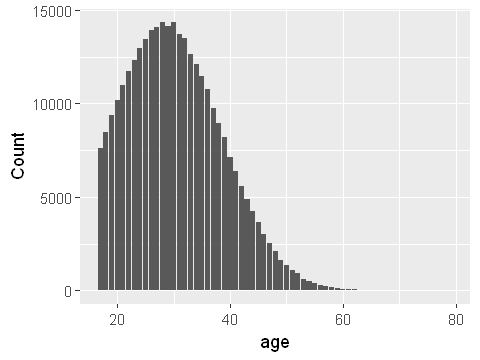

In [12]:
summary(data$age) %>% print()

age_count <- data %>% 
    group_by(age) %>% 
    summarise(Count = n()) 

ggplot(age_count, aes(y = Count, x = age)) +
    geom_bar(stat = "identity")
    

**Observation**: the user base of this site is pretty young, centered around age 30. 

In [13]:
data %>% 
    group_by(source) %>%
    summarise(Count = n()) %>%
    mutate(Percent = Count / sum(Count) * 100) %>%
    arrange(desc(Count))

source,Count,Percent
Seo,155039,49.03225
Ads,88739,28.06438
Direct,72420,22.90337


**Observation**: nearly half of the customers came to the site by clicking search result. 

### Exploratory Data Analysis

>** Build prototypes fast, then iterate**
>
>Don't aim for the perfect model at first, build a prototype fast, present to the users to get feedback, and then improve it. 

This phase is where you uncover trends in the data by asking yourself interesting questions and answering them with creative summaries of data or plots. These plots will help you identify certain trends that achieves a business solution.

Q: How is the conversion rate per country?

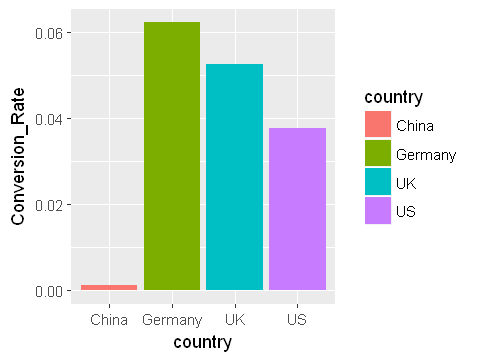

In [14]:
conversion_country <- data %>%
    group_by(country) %>%
    summarise(Conversion_Rate = mean(converted))

ggplot(conversion_country, aes(y = Conversion_Rate, x = country, fill = country)) + geom_bar(stat = "identity")

Here it clearly looks like Chinese convert at a much lower rate than other countries, while Germany is the best.

Q: How is conversion rate affected by customer age?

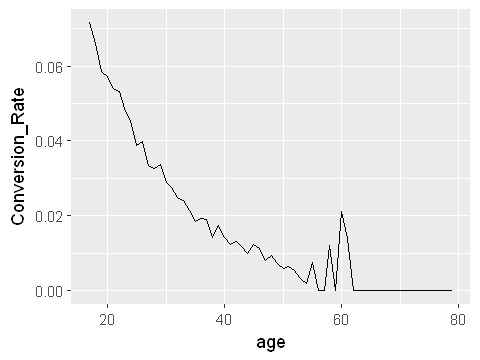

In [15]:
conversion_age <- data %>%
    group_by(age) %>%
    summarise(Conversion_Rate = mean(converted))

ggplot(conversion_age, aes(y = Conversion_Rate, x = age)) +
    geom_line()

We can see that this site works very well for young people and bad for less young people.

Q: Among the paying customers, how many of them just signed up?

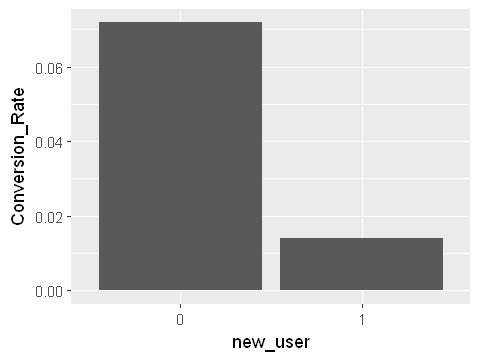

In [16]:
conversion_new_user <- data %>%
    mutate(new_user = as.factor(new_user)) %>%
    group_by(new_user) %>%
    summarise(Conversion_Rate = mean(converted))

ggplot(conversion_new_user, aes(y = Conversion_Rate, x = new_user)) +
    geom_bar(stat="identity")

We see that existing users are much better than new users.

Q: How effective are our marketing channels (sources) in converting visitors?

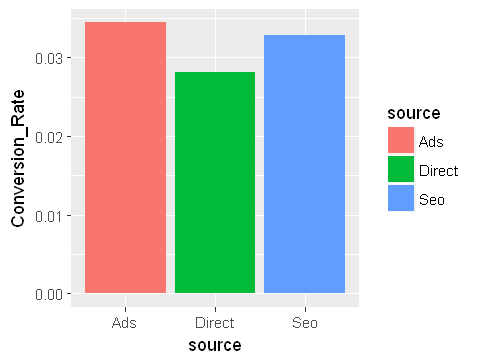

In [17]:
conversion_source <- data %>%
    group_by(source) %>%
    summarise(Conversion_Rate = mean(converted))

ggplot(conversion_source, aes(y = Conversion_Rate, x = source, fill = source)) +
    geom_bar(stat="identity")

We see that the conversion is quite similar for all sources. 

Q: How many pages did the visitors browse before purchasing an item?

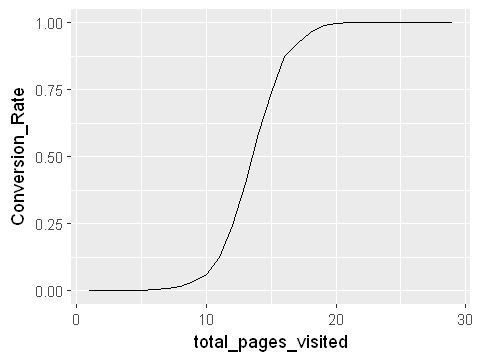

In [18]:
conversion_total_pages_visited <- data %>%
    group_by(total_pages_visited) %>%
    summarise(Conversion_Rate = mean(converted))
ggplot(conversion_total_pages_visited, aes(y = Conversion_Rate, x = total_pages_visited)) + geom_line()

We see higher conversion rate for customers visited more pages. However, this is least **actionable**. It's understandable that customers visit many pages because they already want to buy. Also, in order to buy you have to click on multiple pages.

### Actionable Insights
Recall that the project is to analyse the conversion rate of different customer segments, and then come up with recommendations for the product team and the marketing team to improve the conversion rate. 

<img src="images/action_items.jpg">

## Exercise:
Try performing data analysis on one of the public datasets below using techniques you have learnt:
+ <a href='https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html'> Built-in datasets in R</a>: import with `data()`
+ <a href='https://archive.ics.uci.edu/ml/'> UCI Machine Learning Repository </a>
+ <a href='https://dev.kdnuggets.com/datasets/index.html'> KDNuggets </a>

### Extra: Cool story on the importance of sound data analysis
<img src="images/plane.png">
<img src="images/quora_ans.png">


For the full answer, please head on to: http://qr.ae/TU8zSW